<img src="img/mCIDaeNnb.png" alt="Logo CiDAEN" align="right">




<br><br><br>
<h2><font color="#00586D" size=4>Módulo -</font></h2>



<h1><font color="#00586D" size=5>Series temporales en Python con Pandas</font></h1>

<br><br><br>
<div style="text-align: right">
<font color="#00586D" size=3>Enrique González</font><br>
<font color="#00586D" size=3>Máster en Ciencia de Datos e Ingeniería de Datos en la Nube III </font><br>
<font color="#00586D" size=3>Universidad de Castilla-La Mancha</font>

</div>

---

<a id="indice"></a>
<h2><font color="#00586D" size=5>Índice</font></h2>


* [1. Introducción](#section1)
* [2. Datos temporales](#section2)
* [3. Lectura de series temporales](#section3)
* [4. Índice temporal](#section4)



In [1]:
import matplotlib.pyplot as plt

# Optimiza los gráficos para pantalla retina
%config InlineBackend.figure_format = 'retina'
# Por defecto usamos el backend inline
%matplotlib inline

# Oculta warnings
import warnings
warnings.simplefilter('ignore')

# La libreta ocupa así el 95% de la pantalla
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

---

<a id="section1"></a>
## <font color="#00586D"> 1. Introducción</font>
<br>

Las tratamiento de series temporales presenta nuevos desafíos que hacen que el uso de este tipo de datos deba tratarse específicamente. Asimismo, este tipo de datos es fundamental en numerosas areas de aplicación (finanzas, previsión de demanda, consumo y producción eléctricas, etc.) por lo que es muy importante que un _data scientist_ tenga unas nociones de como trabajar con ellas de forma eficiente. En esta práctica y en las siguientes, os mostraremos como poder trabajar con este tipo de datos con las herramientas del _stack_ de `python`. 

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
__Recordad__: Cread un `virtualenv` e instalad las librerias del `requirement.txt`para poder continuar con la práctica.  
</div>

En esta práctica no vamos a añadir ninguna otra librería más allá de las que habéis trabajado hasta ahora. Sin embargo, vamos a introducir algunos conceptos adicionales a los que ya veníais usando, concretamente en `pandas`. A continación vamos a cargar las librerías que usaremos en la práctica.  

In [2]:
import numpy as np
import pandas as pd

Para ejemplificar los métodos fundamentales sobre series temporales, vamos a utilizar datos meteorológicos. En especial, usaremos los datos meteorológicos de dos estaciones meteorológicas españolas, la estación meteorológica del Retiro en Madrid y la estación meteorológica de La Coruña. Estos datos los podéis encontrar en `datos/meteo_retiro.csv`, con datos meteorológicos diarios desde el 1 de Enero de 1920 y `datos/meteo_coruña.csv`, con datos meteorológicos desde el 1 de Octubre de 1930.  

A continuación os indicamos la descripción de cada una de las columnas presentes en estas tablas:

- `FECHA`: Fecha en formato (aaaa-mm-dd) . Si lo abre con una hoja de cálculo, es posible que interprete el campo como fecha y lo vea en el formato habitual dd/mm/aaaa
- `INDICATIVO`: Identificador de Estación Meteorológica (Valor de 4 ó 5 caracteres)
- `NOMBRE`: Nombre de la Estación
- `PROVINCIA`: Provincia en la que se encuentra
- `ALTITUD`: Altitud (metros)
- `TMEDIA`: Temperatura media (ºC)
- `PRECIPITACION`: Precipitación (mm = l/m2)
- `TMIN`: Temperatura minima (ºC)
- `HORATMIN`: Hora de Temperatura mínima (hh:mm)
- `TMAX`: Temperatura Máxima (ºC)
- `HORATMAX`: Hora de Temperatura máxima (hh:mm)
- `DIR`: Dirección del viento (decenas de grado)
- `VELMEDIA`: Velocidad media (m/s)
- `RACHA`: Racha (m/s)
- `HORARACHA`: Hora Racha (hh:mm)
- `SOL`: Horas de Sol (horas)
- `PRESMAX`: Presión máxima (hPa)
- `HORAPRESMAX`: Hora de Presión Máxima (hh:mm)
- `PRESMIN`: Presión Mínima (hPa)
- `HORAPRESMIN`: Hora de Presión Mínima (hh:mm)


El objetivo de esta práctica es que os familiaricéis con las herramientas básicas disponibles en `pandas` para la lectura, manejo y visualización de series temporales. 

---

<a id="section2"></a>
## <font color="#00586D"> 2. Datos temporales</font>
<br>

El uso de series temporales en `pandas` es relativamente sencillo, no solo nos proporciona soporte nativo para este tipo de datos como columnas en los `pd.DataFrame` si no que también nos proporciona un tipo especial de índice que nos permite hacer multitud de tareas sobre datos series temporales de forma sencilla. A continuación vamos a ver los tipos fundamentales de tiempo en `pandas` así como su uso. 

Existen 4 conceptos relacionados con el tiempo en `pandas`. 
- Date times. Una fecha y hora específica con soporte para zonas horarias (_timezone_). Es como el `datetime.datetime` de python estándar
- Time deltas. Una duración absoluta de tiempo. Es como el `datetime.timedelta` de python estándar. 
- Time spans. Un periodo de tiempo definido por un punto temporal y su frecuencia asociada. 
- Date offsets. Una duración de tiempo relativa, que respeta aritmetica de calendario. Es similar a un Time delta, pero no es absoluto, por lo que puede tener en cuenta, por ejemplo, cambios de horario verano/invierno. 

A continuación podéis ver una tabla resumen con los 4 conceptos anteriores y las clases y métodos correspondientes en pandas para su creación. 

<table class="table">
<colgroup>
<col style="width: 15%" />
<col style="width: 12%" />
<col style="width: 13%" />
<col style="width: 31%" />
<col style="width: 28%" />
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Concepto</p></th>
<th class="head"><p>Clase escalar</p></th>
<th class="head"><p>Clase array</p></th>
<th class="head"><p>pandas Data Type</p></th>
<th class="head"><p>Método principal de creación</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>Date times</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Timestamp</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DatetimeIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">datetime64[ns]</span></code> or <code class="docutils literal notranslate"><span class="pre">datetime64[ns,</span> <span class="pre">tz]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">to_datetime</span></code> or <code class="docutils literal notranslate"><span class="pre">date_range</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>Time deltas</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Timedelta</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">TimedeltaIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">timedelta64[ns]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">to_timedelta</span></code> or <code class="docutils literal notranslate"><span class="pre">timedelta_range</span></code></p></td>
</tr>
<tr class="row-even"><td><p>Time spans</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Period</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">PeriodIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">period[freq]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Period</span></code> or <code class="docutils literal notranslate"><span class="pre">period_range</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>Date offsets</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DateOffset</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">None</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">None</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DateOffset</span></code></p></td>
</tr>
</tbody>
</table>

Los datos tipo _Timestamp_ son los datos más básicos para asociar valores con puntos temporales. Existen varias opciones para crearlos usando [`pd.Timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html) (click para ver docs).

In [3]:
import datetime
t1 = pd.Timestamp(datetime.datetime(2020, 11, 10))

t2 = pd.Timestamp('2020-11-10')

t3 = pd.Timestamp(2020, 11, 10)

print(f't1 y t2 {"SÍ" if t1 == t2 else "NO"} son iguales')
print(f't2 y t3 {"SÍ" if t2 == t3 else "NO"} son iguales')

t1 y t2 SÍ son iguales
t2 y t3 SÍ son iguales


De este tipo de datos, podemos extraer, igual que ocurre con los `datetime` de `python` diferente información de tiempo (podéis ver más ejemplos en la documentación)

In [4]:
t1.year

2020

In [5]:
t1.day

10

No solo podemos crear objetos de tipo fecha, si no que también podemos añadir información de hora. 

In [6]:
pd.Timestamp('2020-11-10 13:30:05')

Timestamp('2020-11-10 13:30:05')

Según nuestra aplicación, a veces nos interesará asociar tiempo a datos que se producen de forma periódica, y para ello es interesante el tipo [`pd.Period`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Period.html).

In [7]:
pd.Period('2020-11', freq='M')

Period('2020-11', 'M')

Por último, cuando nos interese realizar aritmética con tiempo, es muy interesante [`pd.Timedelta`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.html).

In [8]:
t3 + pd.Timedelta(days=1)

Timestamp('2020-11-11 00:00:00')

Si nuestra aplicación requiere realizar aritmética relativa de tiempo (por ejemplo, sumar meses) no podremos usar _Timedelta_ y tendremos que usar [`pd.DateOffset`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.tseries.offsets.DateOffset.html#pandas.tseries.offsets.DateOffset). 

In [9]:
try:
    t3 + pd.Timedelta(month=1)
except Exception as err:
    print(err)

cannot construct a Timedelta from the passed arguments, allowed keywords are [weeks, days, hours, minutes, seconds, milliseconds, microseconds, nanoseconds]


In [10]:
t3 + pd.DateOffset(months=1)

Timestamp('2020-12-10 00:00:00')

Por último, en esta introducción a los tipos de datos de tiempo en pandas, vamos a introducir como representar datos perdidos. Para ello se utiliza `pd.NaT`. 

In [11]:
print(pd.Timestamp(pd.NaT))
print(pd.Period(pd.NaT))

NaT
NaT


Aunque usar los tipos de datos básicos es interesante para algunas aplicaciones, es muy interesante conocer como generar series a partir de estos. Veamos, en primer lugar, como crear una serie de datos temporal con el método [`pd.date_range`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html).

In [12]:
s1 = pd.Series(pd.date_range('2020', freq='D', periods=3))
s1

0   2020-01-01
1   2020-01-02
2   2020-01-03
dtype: datetime64[ns]

Podemos realizar operaciones temporales con ella como lo hacemos con otras series en `pandas`.

In [13]:
s1 + pd.Timedelta(days=7)

0   2020-01-08
1   2020-01-09
2   2020-01-10
dtype: datetime64[ns]

Como podéis ver, la serie devuelta por `date_range` es de tipo `datetime64[ns]`, es por tanto, una serie de _Timestamps_. Veamos como crear una serie periódica (_Period_) con [`pd.period_range`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html)

In [14]:
pd.Series(pd.period_range('2020-10', freq='M', periods=3))

0    2020-10
1    2020-11
2    2020-12
dtype: period[M]

Como podéis ver, en este caso `pandas` sabe marca el tipo como `period[M]`, de forma que conoce que la serie temporal de un _Time span_ y además que su periodo es mensual (`M`).

No solo podemos generar series usando rangos, también podemos crearlas manualmente, como con otros tipos de datos. 

In [15]:
dia = pd.Timedelta(days=1)
pd.Series([t1,pd.NaT,t2+2*dia])

0   2020-11-10
1          NaT
2   2020-11-12
dtype: datetime64[ns]

Y con estas series, ya podemos formar un `pd.DataFrame` con datos temporales.

In [16]:
pd.DataFrame({
    'dt': pd.date_range('2020-10-1', freq='D', periods=5),
    'y': np.random.rand(5)
})

,dt,y
0,2020-10-01,0.186893
1,2020-10-02,0.916391
2,2020-10-03,0.305885
3,2020-10-04,0.203950
4,2020-10-05,0.135790


<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio 1</font>

Implementa la función `random_walk` para que genere una serie temporal de tipo Random walk con una frequencia diaria, en el que para cada día se genere un nuevo valor sumando o restando 1. Como parámetro a la función se le indicará la fecha inicial y la fecha final de la serie. 

Pista: Revisad la documentación de la función `pd.date_range`

In [17]:
import random

def random_walk(begin: str, end: str, seed: int = 0) -> pd.DataFrame: #Columnas: (dt, y)
    """
    Genera un random walk
    """
    random.seed(seed) #Para reproducir el siguiente ejemplo
    
    #Solución
    choices=[-1,1]
    
    dt_range = pd.date_range(begin, end, freq='D')
    
    s = 1
    data = []
    for dt in dt_range:
        data.append(s)
        s += random.choice(choices)
    
    return pd.DataFrame({
        'dt': dt_range,
        'y': data
    })

In [18]:
begin = '2020-11-01'
end = '2020-11-10'
random_walk(begin,end,0)

,dt,y
0,2020-11-01,1
1,2020-11-02,2
2,2020-11-03,3
3,2020-11-04,2
4,2020-11-05,3
5,2020-11-06,4
6,2020-11-07,5
7,2020-11-08,6
8,2020-11-09,7
9,2020-11-10,8


Resultados esperado:

|    | dt                  |   y |
|---:|:--------------------|----:|
|  0 | 2020-11-01 00:00:00 |   1 |
|  1 | 2020-11-02 00:00:00 |   2 |
|  2 | 2020-11-03 00:00:00 |   3 |
|  3 | 2020-11-04 00:00:00 |   2 |
|  4 | 2020-11-05 00:00:00 |   3 |
|  5 | 2020-11-06 00:00:00 |   4 |
|  6 | 2020-11-07 00:00:00 |   5 |
|  7 | 2020-11-08 00:00:00 |   6 |
|  8 | 2020-11-09 00:00:00 |   7 |
|  9 | 2020-11-10 00:00:00 |   8 |


<div style="text-align: right"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#00586D"></i></font></div>

--- 


<a id="section3"></a>
## <font color="#00586D"> 3. Lectura de series temporales </font>
<br>

Aunque conocer como crear series es importante de cara a familiarizarnos con los tipos de `pandas` para este tipo de datos normalmente nos interesará leer datos de fuentes externas. En realidad, no hay nada particular en cuanto a la propia lectura de series temporales se refiere (se suelen usar, en general, los ficheros de datos que ya conocéis), pero sí que es importante destacar como facilitar la lectura de estos datos, así como la conversión a los tipos de `pandas`, ya que es algo muy habitual. 

Comenzaremos leyendo los datos de meteorología del la estación del Retiro. 

In [19]:
ts = pd.read_csv('./data/meteo_retiro.csv', sep=';')

In [20]:
ts.head()

,FECHA,INDICATIVO,NOMBRE,PROVINCIA,ALTITUD,TMEDIA,PRECIPITACION,TMIN,HORATMIN,TMAX,HORATMAX,DIR,VELMEDIA,RACHA,HORARACHA,SOL,PRESMAX,HORAPRESMAX,PRESMIN,HORAPRESMIN
0,1920-01-01,3195,"MADRID, RETIRO",MADRID,667,10.4,0.0,8.8,23:59,11.9,10:30,NaN,NaN,NaN,NaN,3.5,934.6,00,925.3,15
1,1920-01-02,3195,"MADRID, RETIRO",MADRID,667,6.8,0.0,2.6,06:30,11.0,12:30,NaN,NaN,NaN,NaN,7.4,940.3,11,931.9,00
2,1920-01-03,3195,"MADRID, RETIRO",MADRID,667,5.5,1.4,2.4,23:30,8.6,09:30,NaN,NaN,NaN,NaN,3.3,937.3,00,923.7,24
3,1920-01-04,3195,"MADRID, RETIRO",MADRID,667,4.6,0.0,2.5,22:00,6.8,13:30,NaN,NaN,NaN,NaN,3.3,929.0,24,922.7,04
4,1920-01-05,3195,"MADRID, RETIRO",MADRID,667,4.1,0.0,1.6,08:00,6.6,00:00,NaN,NaN,NaN,NaN,5.3,933.8,23,928.7,00


Veamos una descripción del dataset

In [21]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36799 entries, 0 to 36798
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FECHA          36799 non-null  object 
 1   INDICATIVO     36799 non-null  int64  
 2   NOMBRE         36799 non-null  object 
 3   PROVINCIA      36799 non-null  object 
 4   ALTITUD        36799 non-null  int64  
 5   TMEDIA         36682 non-null  float64
 6   PRECIPITACION  35924 non-null  object 
 7   TMIN           36682 non-null  float64
 8   HORATMIN       35798 non-null  object 
 9   TMAX           36684 non-null  float64
 10  HORATMAX       35832 non-null  object 
 11  DIR            28825 non-null  float64
 12  VELMEDIA       31892 non-null  float64
 13  RACHA          28916 non-null  float64
 14  HORARACHA      28543 non-null  object 
 15  SOL            28615 non-null  float64
 16  PRESMAX        35236 non-null  float64
 17  HORAPRESMAX    35236 non-null  object 
 18  PRESMI

Como vemos, todos los datos de tipo fecha se han cargado como tipo `object`, que es un `string`. Esto normalmente no es lo que deseamos, pero podemos arreglarlo fácilmente usando [`pd.to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) (Podéis consultar la tabla de la sección 1 para ver los equivalentes para el resto de tipos de datos temporales)

In [22]:
ts['dt'] = pd.to_datetime(ts['FECHA'], format="%Y-%m-%d")

In [23]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36799 entries, 0 to 36798
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   FECHA          36799 non-null  object        
 1   INDICATIVO     36799 non-null  int64         
 2   NOMBRE         36799 non-null  object        
 3   PROVINCIA      36799 non-null  object        
 4   ALTITUD        36799 non-null  int64         
 5   TMEDIA         36682 non-null  float64       
 6   PRECIPITACION  35924 non-null  object        
 7   TMIN           36682 non-null  float64       
 8   HORATMIN       35798 non-null  object        
 9   TMAX           36684 non-null  float64       
 10  HORATMAX       35832 non-null  object        
 11  DIR            28825 non-null  float64       
 12  VELMEDIA       31892 non-null  float64       
 13  RACHA          28916 non-null  float64       
 14  HORARACHA      28543 non-null  object        
 15  SOL            2861

Como podéis ver, el método `pd.to_datetime` nos permite específicar el formato de fecha y hora que queramos parsear. Es el mismo formato que se usa en los métodos `datetime.strftime` y `datetime.strptime`. Podéis ver como especificar formato más complejos [este enlace](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

Vemos también que existen otras columnas que se podrían interpretar como datos de tipo temporal. En este caso, las horas en las que se produjeron ciertos eventos (como la temperatura máxima). 

In [24]:
ts.head(5)[['HORATMIN', 'HORATMAX']]

,HORATMIN,HORATMAX
0,23:59,10:30
1,06:30,12:30
2,23:30,09:30
3,22:00,13:30
4,08:00,00:00


En este caso, estos datos podría interesarnos interpretarlos como _Timedeltas_. Para ello, como _Timedelta_ solo admite el formato el `hh:mm:ss` tenemos que modificar ligeramente las cadenas. Veamos como hacerlo con los primeros valores de `HORATMAX` (hay valores anómalos en toda la serie, que no trataremos aquí). 

In [25]:
pd.to_timedelta(ts.head(10).HORATMAX + ':00')

0   0 days 10:30:00
1   0 days 12:30:00
2   0 days 09:30:00
3   0 days 13:30:00
4   0 days 00:00:00
5   0 days 16:00:00
6   0 days 15:00:00
7   0 days 16:00:00
8   0 days 14:00:00
9   0 days 00:00:00
Name: HORATMAX, dtype: timedelta64[ns]

Por último, hay una forma muy ágil de leer datasets con datos de tipo temporal, y esto es usar `parse_dates`

In [26]:
ts = pd.read_csv('./data/meteo_retiro.csv', sep=';', parse_dates=['FECHA'])

In [27]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36799 entries, 0 to 36798
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   FECHA          36799 non-null  datetime64[ns]
 1   INDICATIVO     36799 non-null  int64         
 2   NOMBRE         36799 non-null  object        
 3   PROVINCIA      36799 non-null  object        
 4   ALTITUD        36799 non-null  int64         
 5   TMEDIA         36682 non-null  float64       
 6   PRECIPITACION  35924 non-null  object        
 7   TMIN           36682 non-null  float64       
 8   HORATMIN       35798 non-null  object        
 9   TMAX           36684 non-null  float64       
 10  HORATMAX       35832 non-null  object        
 11  DIR            28825 non-null  float64       
 12  VELMEDIA       31892 non-null  float64       
 13  RACHA          28916 non-null  float64       
 14  HORARACHA      28543 non-null  object        
 15  SOL            2861

In [28]:
ts.head()

,FECHA,INDICATIVO,NOMBRE,PROVINCIA,ALTITUD,TMEDIA,PRECIPITACION,TMIN,HORATMIN,TMAX,HORATMAX,DIR,VELMEDIA,RACHA,HORARACHA,SOL,PRESMAX,HORAPRESMAX,PRESMIN,HORAPRESMIN
0,1920-01-01,3195,"MADRID, RETIRO",MADRID,667,10.4,0.0,8.8,23:59,11.9,10:30,NaN,NaN,NaN,NaN,3.5,934.6,00,925.3,15
1,1920-01-02,3195,"MADRID, RETIRO",MADRID,667,6.8,0.0,2.6,06:30,11.0,12:30,NaN,NaN,NaN,NaN,7.4,940.3,11,931.9,00
2,1920-01-03,3195,"MADRID, RETIRO",MADRID,667,5.5,1.4,2.4,23:30,8.6,09:30,NaN,NaN,NaN,NaN,3.3,937.3,00,923.7,24
3,1920-01-04,3195,"MADRID, RETIRO",MADRID,667,4.6,0.0,2.5,22:00,6.8,13:30,NaN,NaN,NaN,NaN,3.3,929.0,24,922.7,04
4,1920-01-05,3195,"MADRID, RETIRO",MADRID,667,4.1,0.0,1.6,08:00,6.6,00:00,NaN,NaN,NaN,NaN,5.3,933.8,23,928.7,00


Sin embargo, esto solo nos funcionará para tipos de fechas concretas, por lo que normalmente es conveniente utilizar `pd.to_datetime` si tenemos dudas.

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio 2</font>

Implementad la función `carga_coruña` a la que introduciremos la ruta al fichero de datos meteorológicos de La Coruña y que tiene que retornar un `pd.DataFrame` con las siguientes columnas:
- `dt` (_pd.Timestamp_): El _timestamp_ de los datos, correctamente tipado. 
- `temp` (_double_): La temperatura media del día. 
- `dt_temp_max` (_pd.Timestamp_): El _timestamp_ del momento de mayor temperatura. 
- `dt_temp_min` (_pd.Timestamp_): El _timestamp_ del momento con menor temperatura.

Fíjate que pedímos el timestamp, no solo la hora. 

Pistas: 
- A la hora de cargar los datos, tendréis que usar una codificación diferente. Probad "latin9".
- Si encontráis valores que no corresponden con horas, simplemente tratarlos como perdidos (`pd.NaT`)

In [29]:
import random

def carga_coruña(ruta: str) -> pd.DataFrame: 
    """
    Carga los datos de La Coruña
    """
    
    #Solución
    ts = pd.read_csv('./data/meteo_coruña.csv', sep=';', encoding='latin9')
    ts["dt"] = pd.to_datetime(ts.FECHA)
    
    ts[ts["HORATMAX"] == "Varias"] = pd.NaT
    horas = pd.to_datetime(ts.HORATMAX).dt.time.astype(str)
    ts["dt_temp_max"] = pd.to_timedelta(horas) + ts["dt"]
    
    ts[ts["HORATMIN"] == "Varias"] = pd.NaT
    horas = pd.to_datetime(ts.HORATMIN).dt.time.astype(str)
    ts["dt_temp_min"] = pd.to_timedelta(horas) + ts["dt"]
    
    ts["temp"] = ts.TMEDIA
    
    return ts[["dt", "temp", "dt_temp_max", "dt_temp_min"]]

In [30]:
begin = '2020-11-01'
end = '2020-11-10'
carga_coruña('./data/meteo_coruña.csv').tail(10)

,dt,temp,dt_temp_max,dt_temp_min
32896,2020-10-24,17.3,2020-10-24 12:30:00,2020-10-24 01:20:00
32897,2020-10-25,13.2,2020-10-25 00:20:00,2020-10-25 23:40:00
32898,2020-10-26,12.7,2020-10-26 13:10:00,2020-10-26 01:20:00
32899,2020-10-27,15.6,2020-10-27 13:50:00,2020-10-27 01:50:00
32900,NaT,NaT,NaT,NaT
32901,2020-10-29,16.0,2020-10-29 14:20:00,2020-10-29 07:20:00
32902,2020-10-30,16.6,2020-10-30 14:50:00,2020-10-30 06:40:00
32903,2020-10-31,19.0,2020-10-31 12:20:00,2020-10-31 00:00:00
32904,2020-11-01,20.7,2020-11-01 12:50:00,2020-11-01 08:30:00
32905,2020-11-02,16.7,2020-11-02 01:20:00,2020-11-02 21:50:00


Resultados esperado:

|       | dt                  | temp   | dt_temp_max         | dt_temp_min         |
|------:|:--------------------|:-------|:--------------------|:--------------------|
| 32896 | 2020-10-24 00:00:00 | 17.3   | 2020-10-24 12:30:00 | 2020-10-24 01:20:00 |
| 32897 | 2020-10-25 00:00:00 | 13.2   | 2020-10-25 00:20:00 | 2020-10-25 23:40:00 |
| 32898 | 2020-10-26 00:00:00 | 12.7   | 2020-10-26 13:10:00 | 2020-10-26 01:20:00 |
| 32899 | 2020-10-27 00:00:00 | 15.6   | 2020-10-27 13:50:00 | 2020-10-27 01:50:00 |
| 32900 | NaT                 | NaT    | NaT                 | NaT                 |
| 32901 | 2020-10-29 00:00:00 | 16.0   | 2020-10-29 14:20:00 | 2020-10-29 07:20:00 |
| 32902 | 2020-10-30 00:00:00 | 16.6   | 2020-10-30 14:50:00 | 2020-10-30 06:40:00 |
| 32903 | 2020-10-31 00:00:00 | 19.0   | 2020-10-31 12:20:00 | 2020-10-31 00:00:00 |
| 32904 | 2020-11-01 00:00:00 | 20.7   | 2020-11-01 12:50:00 | 2020-11-01 08:30:00 |
| 32905 | 2020-11-02 00:00:00 | 16.7   | 2020-11-02 01:20:00 | 2020-11-02 21:50:00 |




<div style="text-align: right"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#00586D"></i></font></div>

--- 


<a id="section4"></a>
## <font color="#00586D"> 4. Índice temporal </font>
<br>

Ya hemos visto como manejar los tipos de datos temporales que nos proporciona `pandas` así como como leer datos de tiempo de forma cómoda. Sin embargo, la potencia para el tratamiento de series temporales que nos proporciona esta librería no termina ahí. De hecho, quizá el concepto más importante que esta librería nos proporciona es el concepto de índice temporal, un índice especial que nos permite tratar de forma muy cómoda series temporales. Para usarlo, simplemente tenemos que asignar al índice una serie de datos temporales como a continuación en una `pd.Series`.

In [31]:
t = pd.Series(data = np.random.rand(5), index =  pd.date_range('2020-10-1', freq='D', periods=5))
t

2020-10-01    0.823163
2020-10-02    0.649518
2020-10-03    0.876997
2020-10-04    0.188046
2020-10-05    0.723444
Freq: D, dtype: float64

También lo podemos usar en un `pd.DataFrame`.

In [32]:
df = pd.DataFrame({
        'foo': np.random.rand(10),
        'bar': np.random.rand(10)
}, index=pd.date_range('2020-10-1', freq='D', periods=10))

In [33]:
df

,foo,bar
2020-10-01,0.354292,0.901146
2020-10-02,0.470502,0.629272
2020-10-03,0.073042,0.109251
2020-10-04,0.686516,0.025684
2020-10-05,0.323976,0.492263
2020-10-06,0.230396,0.544679
2020-10-07,0.874823,0.806861
2020-10-08,0.175678,0.796637
2020-10-09,0.086485,0.274983
2020-10-10,0.278133,0.270751


Una vez con este tipo de índice podemos hacer operaciones varias operaciones de índole temporal. Una de las más interesantes es el _slicing_. Veamos, por ejemplo, como obtener datos de un periodo de tiempo. 

In [34]:
df['2020-10-03':'2020-10-06']

,foo,bar
2020-10-03,0.073042,0.109251
2020-10-04,0.686516,0.025684
2020-10-05,0.323976,0.492263
2020-10-06,0.230396,0.544679


También podemos tomar un día específico (debemos usar `.loc` para que no lo tome como una columna). 

In [35]:
df.loc['2020-10-03']

foo    0.073042
bar    0.109251
Name: 2020-10-03 00:00:00, dtype: float64

También podemos obtener los datos de un único mes o año. Veamos un ejemplo usando los datos meteorológicos del retiro. Aprovechamos también para introducir otro atajo a la hora de leer datos, ya que podemos cargar directamente la columna que queramos como índice. 

In [36]:
ts = pd.read_csv('./data/meteo_retiro.csv', sep=';', parse_dates=['FECHA'], index_col='FECHA')[['TMEDIA']]
ts

,TMEDIA
FECHA,
1920-01-01,10.4
1920-01-02,6.8
1920-01-03,5.5
1920-01-04,4.6
1920-01-05,4.1
...,...
2020-10-29,11.8
2020-10-30,13.0
2020-10-31,14.4


Tomemos las temperaturas de los tres primeros meses de 2020. 

In [37]:
ts['2020-01': '2020-03']

,TMEDIA
FECHA,
2020-01-01,6.6
2020-01-02,6.0
2020-01-03,3.8
2020-01-04,7.0
2020-01-05,6.2
...,...
2020-03-27,6.2
2020-03-28,9.2
2020-03-29,12.2


O de los datos que disponemos de 2020

In [38]:
ts.loc['2020']

,TMEDIA
FECHA,
2020-01-01,6.6
2020-01-02,6.0
2020-01-03,3.8
2020-01-04,7.0
2020-01-05,6.2
...,...
2020-10-29,11.8
2020-10-30,13.0
2020-10-31,14.4


Aparte de un gran número de operaciones específicas para series temporales, este tipo de índices os permitirán visualizar una serie temporal de forma muy sencilla. Por ejemplo, grafiquemos la temperatura media diaria de la última década.

<AxesSubplot: xlabel='FECHA'>

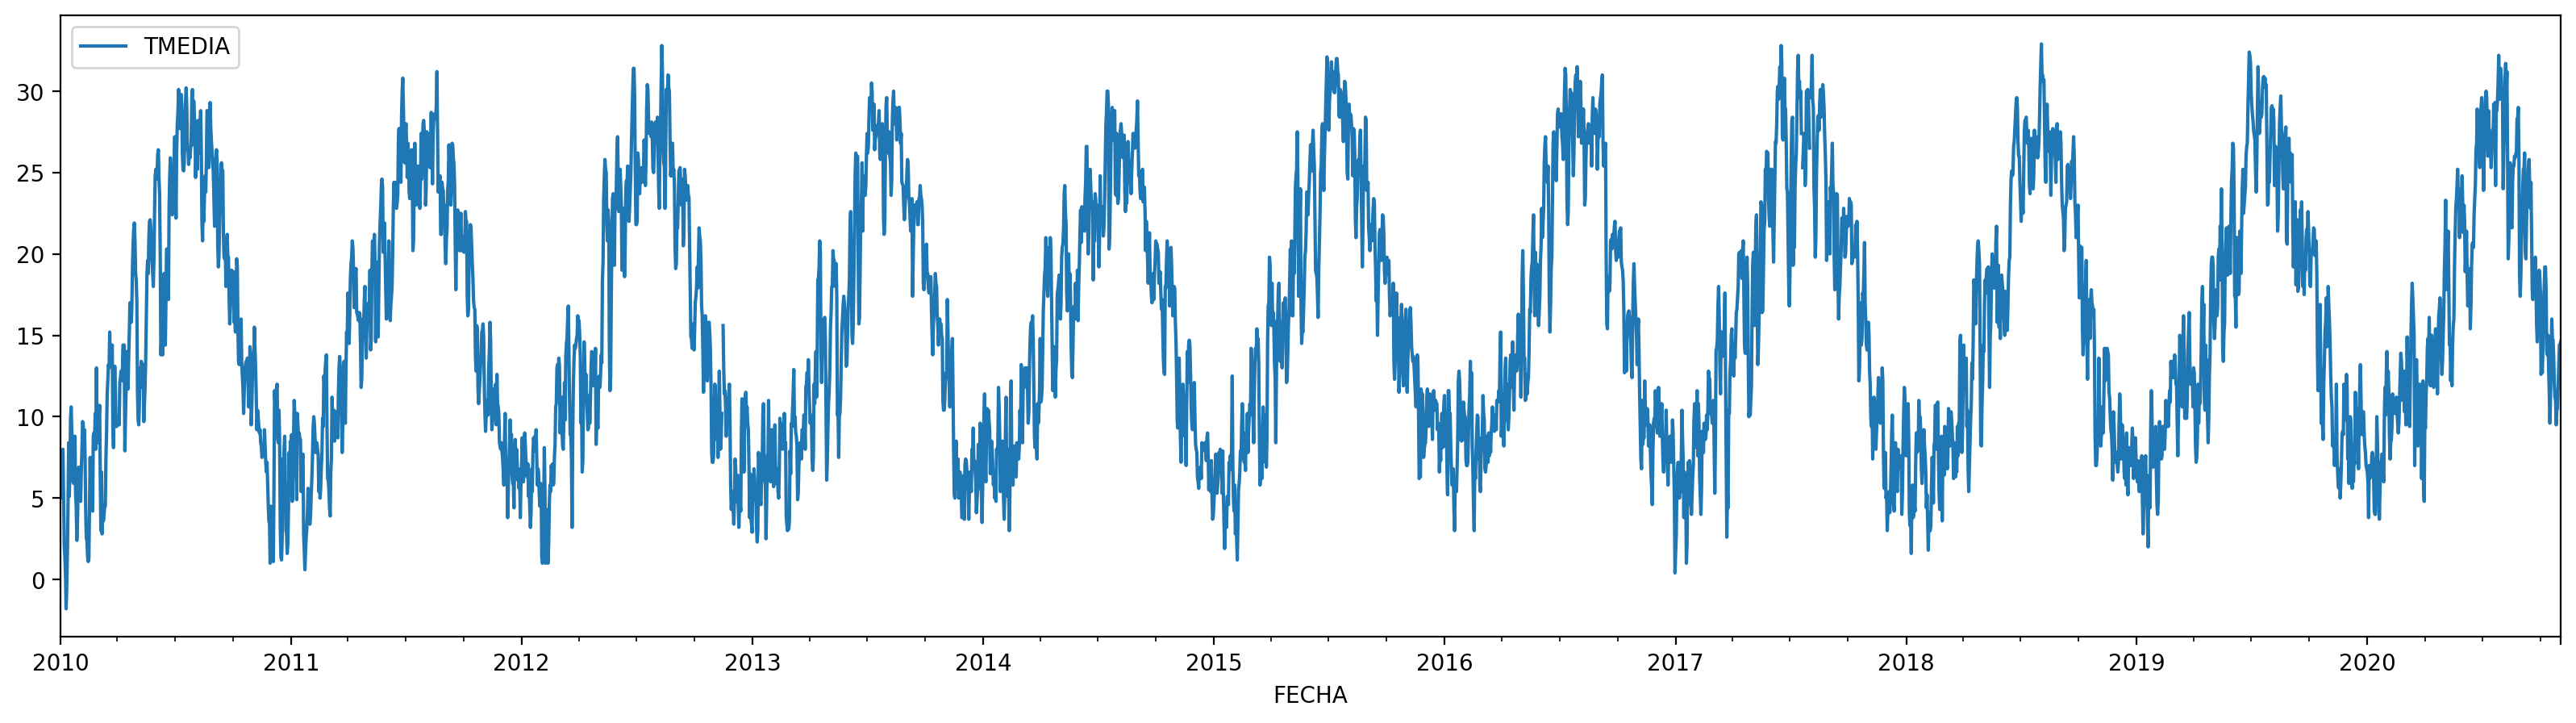

In [39]:
ts['2010':].plot(figsize=(20,5))

En esta última gráfica podéis modificar la estética así como los componentes del gráfico usando `matplotlib` y también las opciones propias de `plot`.

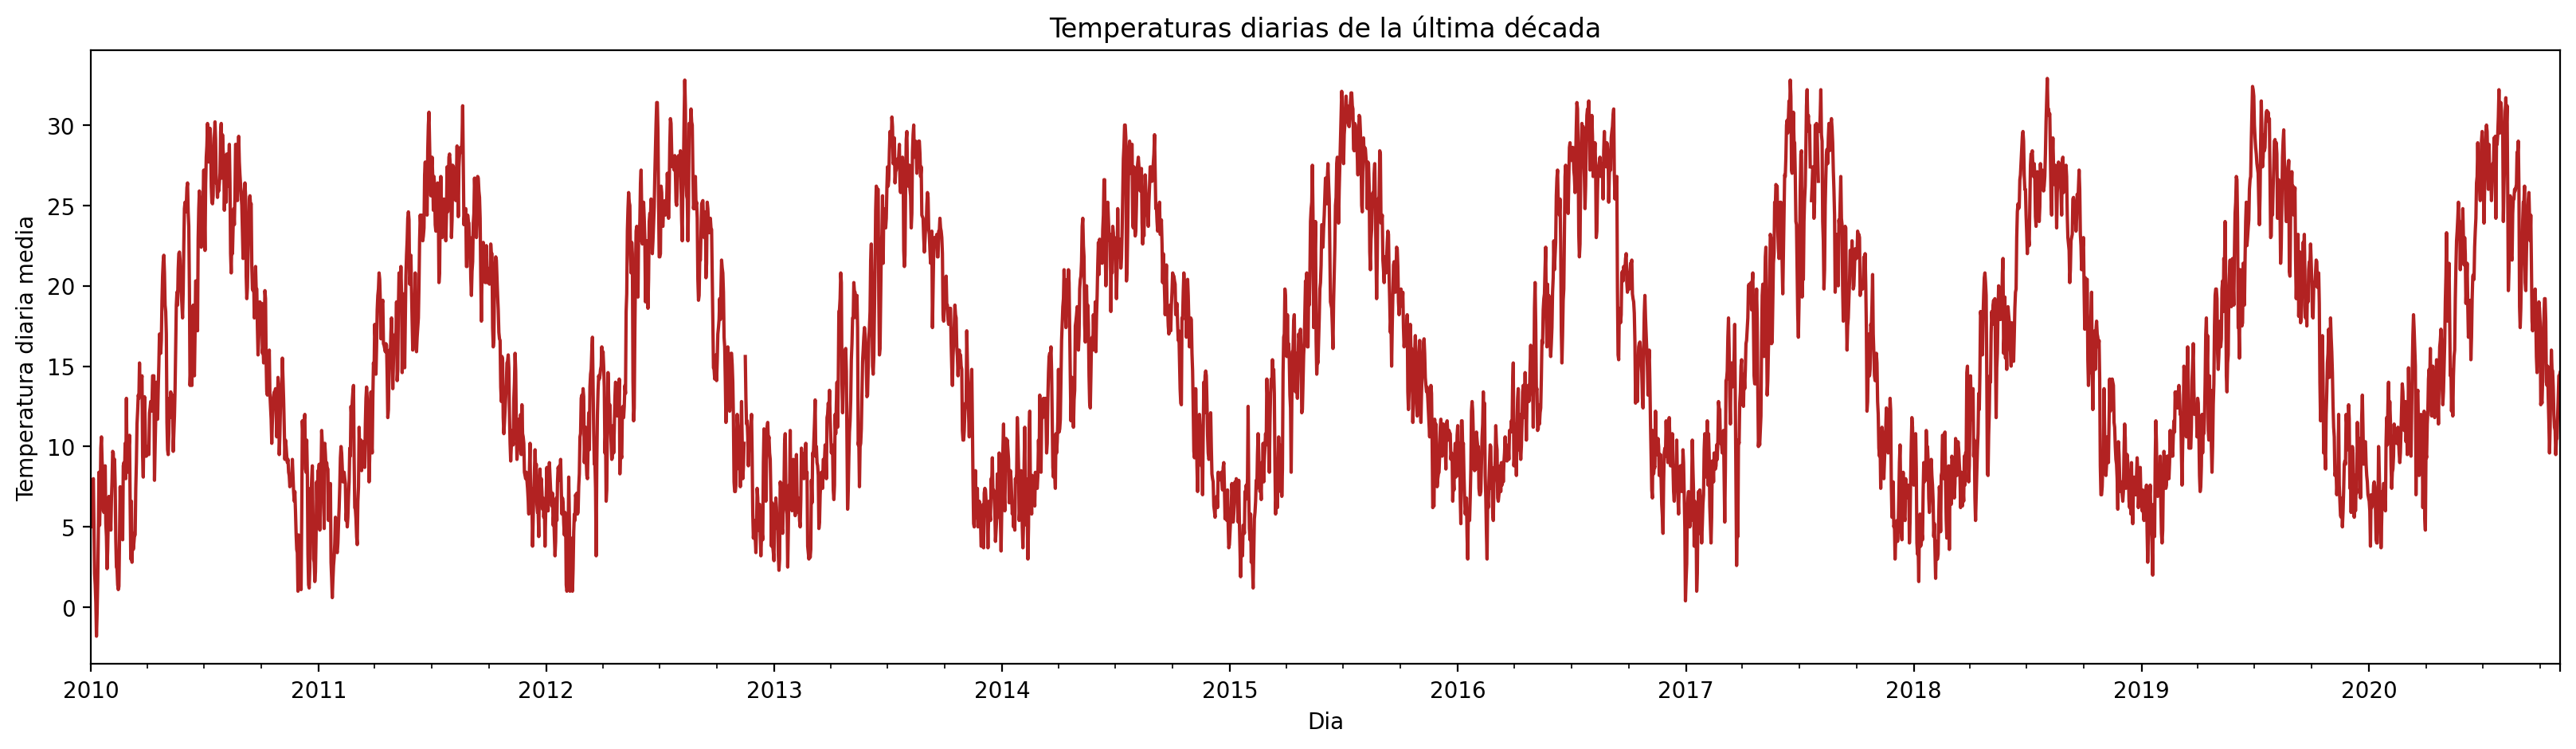

In [40]:
import matplotlib.pyplot as plt

ax = ts['2010':].plot(figsize=(20,5), color='firebrick', ls='-')
plt.title('Temperaturas diarias de la última década');
plt.xlabel('Dia');
plt.ylabel('Temperatura diaria media');
ax.get_legend().remove()

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio 3</font>

Implementad la función `temperatura_coruña` a la que indicaremos el periodo de temperatura a graficar y que tendrá que generar una gráfica como la que hemos visto en el ejemplo anterior. El periodo que se introducirá será la fecha de inicio y final y serán fechas válidas para `pandas`. 

Leed el conjunto de datos de forma correcta en la propia función.

<font size=4> <i class="fa fa-book" aria-hidden="true" style="color:#00586D"></i> </font> __Opcional__ Intentad reproducir el gráfico tal cual os lo muestro en resultado esperado. Para ello necesitaréis usar `plt.annotate` y `matplotlib.dates.date2num` (el color del gráfico es `forestgreen` por si lo queréis reproducir también)


In [41]:
import random
import matplotlib

def temperatura_coruña(inicio: str, final: str) -> None: 
    """
    Muestra un gráfico de la temperatura media diaria en La Coruña para el periodo indicado. 
    """
    
    #Solución
    ts = pd.read_csv(
        './data/meteo_coruña.csv', 
        sep=';', parse_dates=['FECHA'], index_col='FECHA', encoding='latin9'
    ).loc[inicio:final, ['TMEDIA']]
    ax = ts.plot(figsize=(20,5), color='forestgreen')
    plt.title(f'Temperaturas diarias entre {inicio} y {final} en La Coruña')
    plt.xlabel('Dia')
    plt.ylabel('Temperatura diaria media')
    ax.get_legend().remove()
    
    #Opcional
    temp_max = ts.max()
    temp_max_dt = ts.idxmax()
    temp_min = ts.min()
    temp_min_dt = ts.idxmin()
    max_xy = (matplotlib.dates.date2num(temp_max_dt), temp_max)
    max_text = (matplotlib.dates.date2num(temp_max_dt)+10, temp_max-0.1)
    min_xy = (matplotlib.dates.date2num(temp_min_dt), temp_min)
    min_text = (matplotlib.dates.date2num(temp_min_dt)+10, temp_min-0.1)
    plt.annotate(
        f"Máximo {temp_max[0]}ºC", 
        max_xy, 
        max_text,
        arrowprops=dict(facecolor='firebrick', shrink=0.1, width=5)
    )
    plt.annotate(
        f"Mínimo {temp_min[0]}ºC", 
        min_xy, 
        min_text,
        arrowprops=dict(facecolor='royalblue', shrink=0.1, width=5)
    )
    #plt.savefig('img/ej3.png')

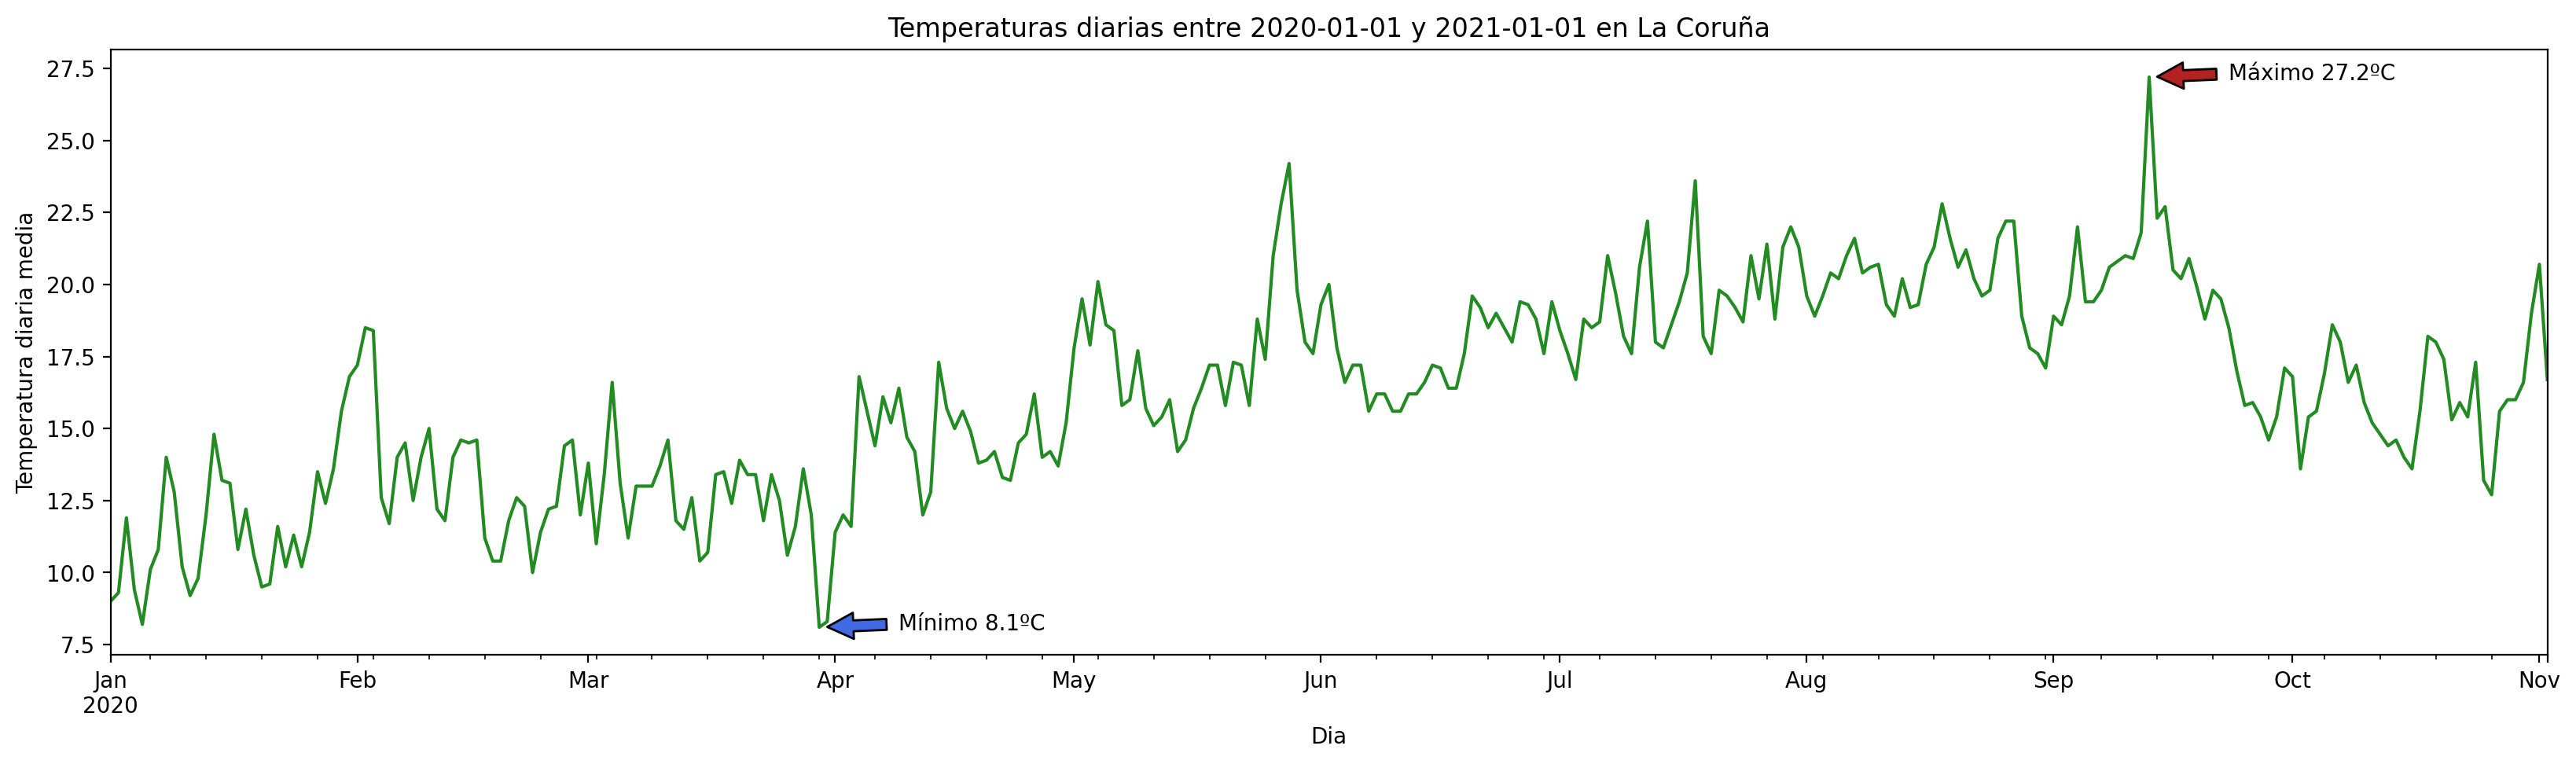

In [42]:
begin = '2020-01-01'
end = '2021-01-01'
temperatura_coruña(begin, end)

Resultado esperado:

![resultado](img/ej3.png)




<div style="text-align: right"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#00586D"></i></font></div>

--- 



<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#00586D"></i> </font></div>